In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
import time

In [2]:
class MyCustomState(TypedDict):
    task_list: list[dict]
    current_task: dict
    task_result: dict

In [3]:
def get_next_task(state):
    if state['task_list']:
        task_list = state['task_list']
        current_task = task_list.pop(0)
        print(f"\nRetrieved task: {current_task['description']}")
        return {
            **state,
            "task_list": task_list,
            "current_task": current_task
        }

In [4]:
from typing import Literal

def decide_task_type(state) -> Literal['process_research_task', 'process_purchase_task', 'wait']:
    task = state['current_task']
    if task['type'] == 'research':
        return 'process_research_task'
    elif task['type'] == 'purchase':
        return 'process_purchase_task'
    else:
        return 'wait'


In [5]:
def process_research_task(state) -> str:
    task = state['current_task']
    print(f"\nProcessing Research Task: {task['description']}")
    # Simulate research processing
    time.sleep(1)
    result = f"Completed research on: {task['description']}"
    task_result = {'status': 'completed', 'result': result}
    print(task_result)
    # Pause before next task
    time.sleep(1)
    return {
        **state,
        "task_result": task_result
    }

def process_purchase_task(state) -> str:
    task = state['current_task']
    print(f"\nProcessing Purchase Task: {task['description']}")
    # Simulate finding purchase options
    options = [
        {'product': 'Product A', 'price': '$100'},
        {'product': 'Product B', 'price': '$150'},
        {'product': 'Product C', 'price': '$200'}
    ]
    print("Found the following options:")
    for idx, option in enumerate(options, 1):
        print(f"{idx}. {option['product']} - {option['price']}")
    choice = input("Please select an option (enter number) or type 'skip' to skip: ")
    if choice.lower() == 'skip':
        print("Task skipped.")
        task_result = {'status': 'skipped', 'result': '-_- Skipped -_-'}
    else:
        try:
            selected_option = options[int(choice)-1]
            print(f"You selected: {selected_option['product']} costing {selected_option['price']}")
            print("Please proceed to purchase manually.")
            task_result = {'status': 'pending', 'selected_option': selected_option}
        except (IndexError, ValueError):
            print("Invalid input. Task skipped.")
            task_result = {'status': 'skipped'}
    # Pause before next task
    time.sleep(1)
    return {
        **state,
        "task_result": task_result
    }

def wait(state):
    print("Waiting...")
    time.sleep(1)
    return state


In [6]:
# Initialize the graph builder
workflow = StateGraph(MyCustomState)

# workflow.add_node(START, lambda state: state)
workflow.add_node('get_next_task', get_next_task)
workflow.add_node('process_research_task', process_research_task)
workflow.add_node('process_purchase_task', process_purchase_task)
workflow.add_node('wait', wait)

workflow.add_edge(START, 'get_next_task')
workflow.add_conditional_edges('get_next_task', decide_task_type)
workflow.add_edge('process_research_task', 'get_next_task')
workflow.add_edge('process_purchase_task', 'get_next_task')

In [8]:
# Add
graph = workflow.compile()

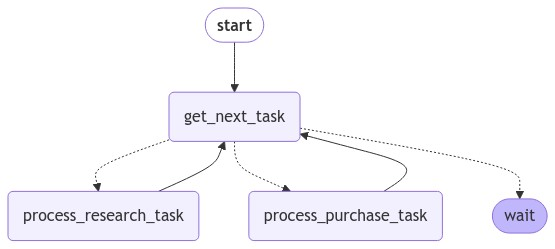

In [9]:
from IPython.display import Image, display

# Display the graph as a Mermaid diagram
display(Image(graph.get_graph().draw_mermaid_png()))


In [10]:
# Initial task list
initial_task_list = [
    {'type': 'research', 'description': 'Find the latest trends in AI.'},
    {'type': 'purchase', 'description': 'Purchase a new smartphone under $500.'}
]

# Initial state
initial_state = {
    'task_list': initial_task_list,
    'current_task': {},
    'task_result': {}
}

# Run the graph
graph.invoke(initial_state)



Retrieved task: Find the latest trends in AI.

Processing Research Task: Find the latest trends in AI.
{'status': 'completed', 'result': 'Completed research on: Find the latest trends in AI.'}

Retrieved task: Purchase a new smartphone under $500.

Processing Purchase Task: Purchase a new smartphone under $500.
Found the following options:
1. Product A - $100
2. Product B - $150
3. Product C - $200
You selected: Product B costing $150
Please proceed to purchase manually.

Processing Purchase Task: Purchase a new smartphone under $500.
Found the following options:
1. Product A - $100
2. Product B - $150
3. Product C - $200
You selected: Product A costing $100
Please proceed to purchase manually.

Processing Purchase Task: Purchase a new smartphone under $500.
Found the following options:
1. Product A - $100
2. Product B - $150
3. Product C - $200
Invalid input. Task skipped.

Processing Purchase Task: Purchase a new smartphone under $500.
Found the following options:
1. Product A - $10

KeyboardInterrupt: 